Epoch [1/4], Step [100/1021], Loss: 1.1665


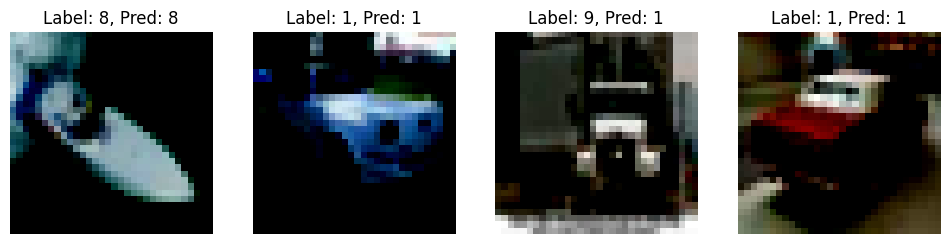

Epoch [1/4], Step [200/1021], Loss: 1.5817


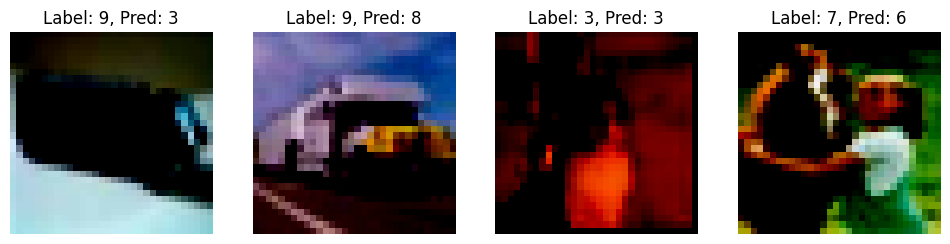

Epoch [1/4], Step [300/1021], Loss: 1.4187


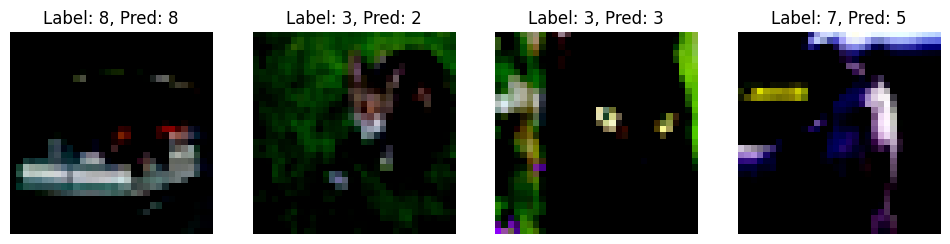

Epoch [1/4], Step [400/1021], Loss: 1.4749


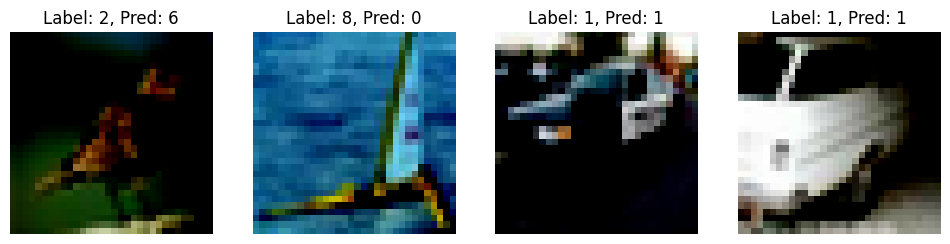

Epoch [1/4], Step [500/1021], Loss: 1.0183


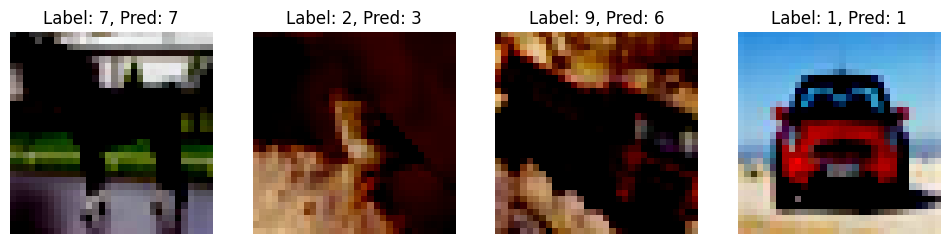

Epoch [1/4], Step [600/1021], Loss: 0.9981


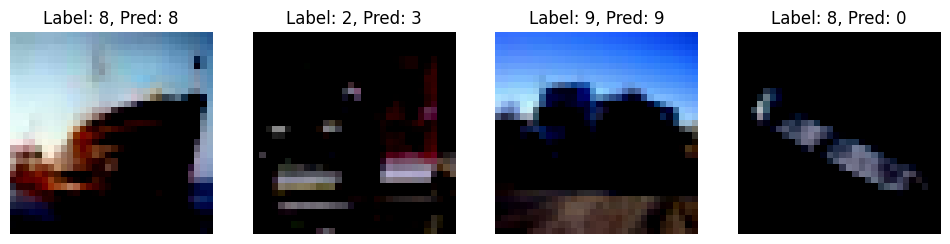

Epoch [1/4], Step [700/1021], Loss: 0.9421


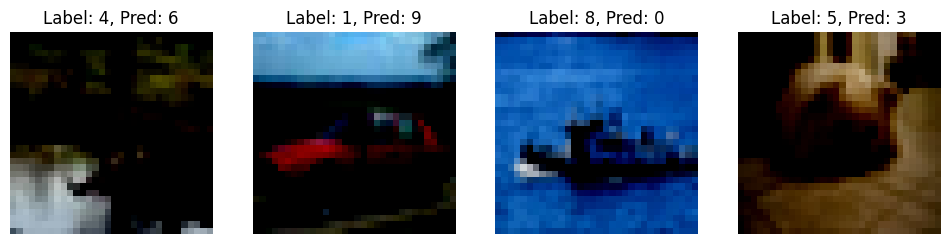

Epoch [1/4], Step [800/1021], Loss: 1.3636


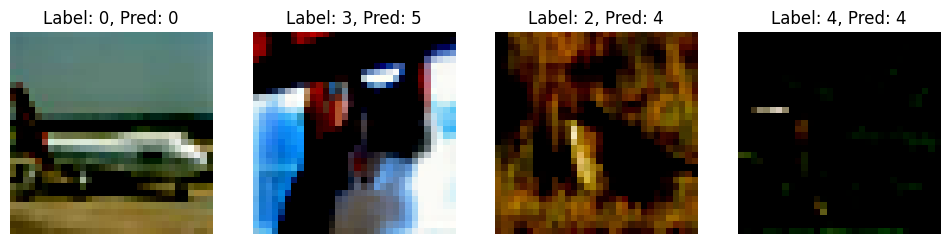

Epoch [1/4], Step [900/1021], Loss: 1.1242


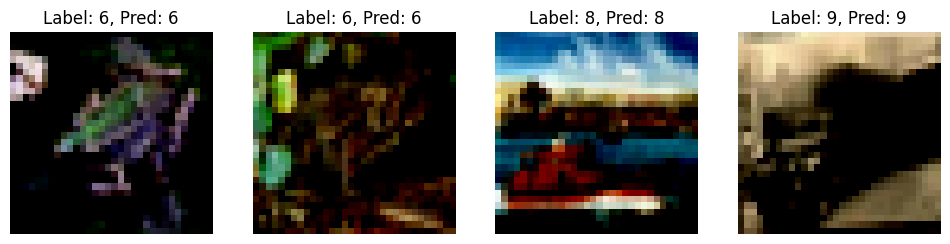

Epoch [1/4], Step [1000/1021], Loss: 0.9238


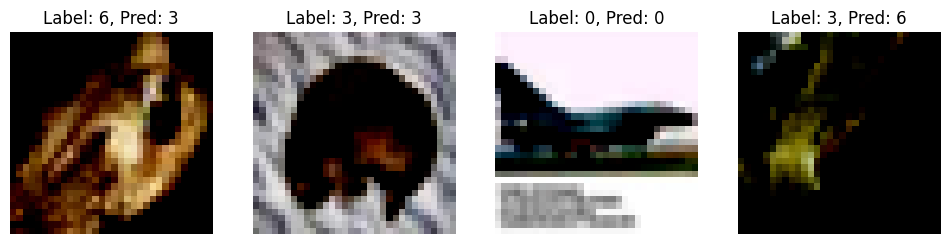

Epoch [2/4], Step [100/1021], Loss: 0.9735


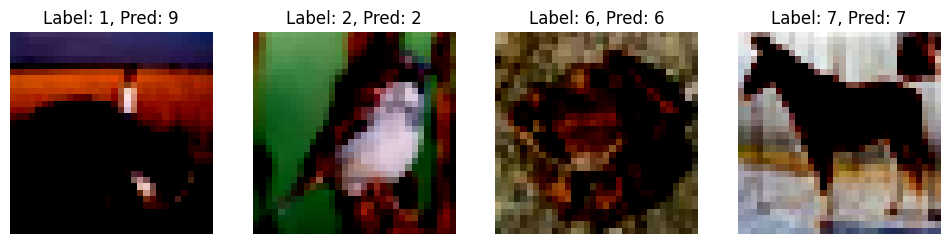

Epoch [2/4], Step [200/1021], Loss: 1.0796


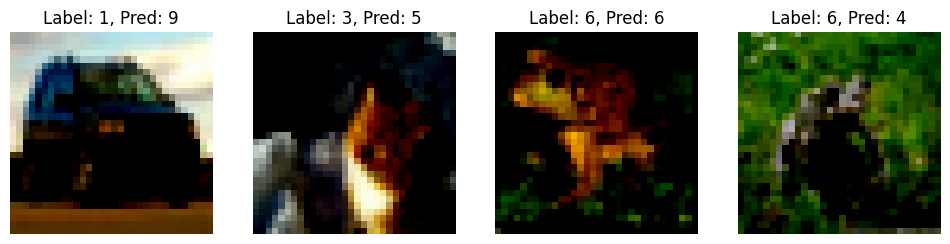

Epoch [2/4], Step [300/1021], Loss: 0.4129


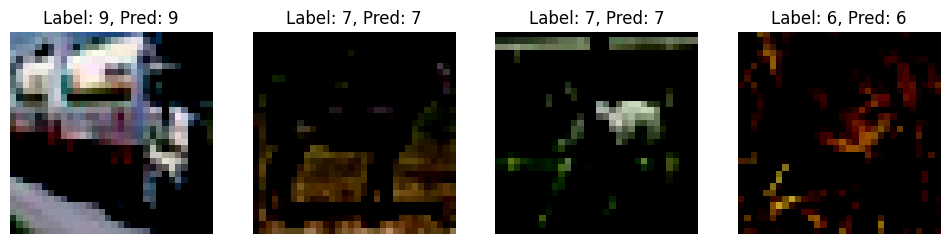

Epoch [2/4], Step [400/1021], Loss: 0.7952


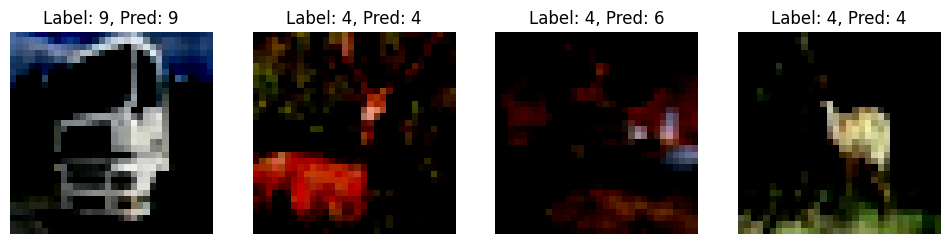

Epoch [2/4], Step [500/1021], Loss: 0.6817


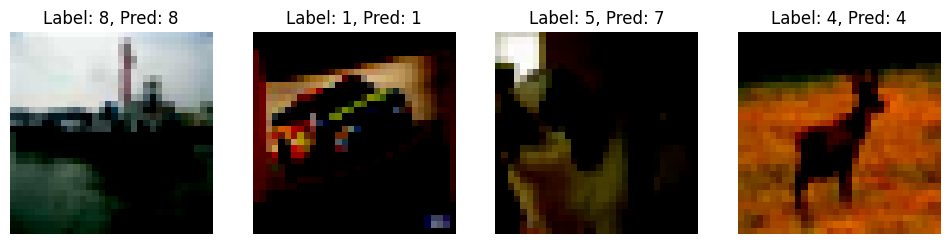

Epoch [2/4], Step [600/1021], Loss: 0.9932


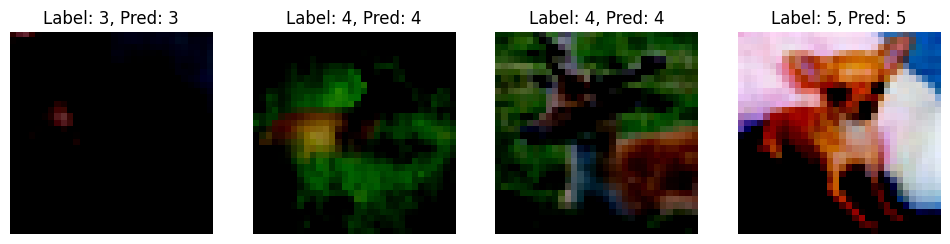

Epoch [2/4], Step [700/1021], Loss: 1.0153


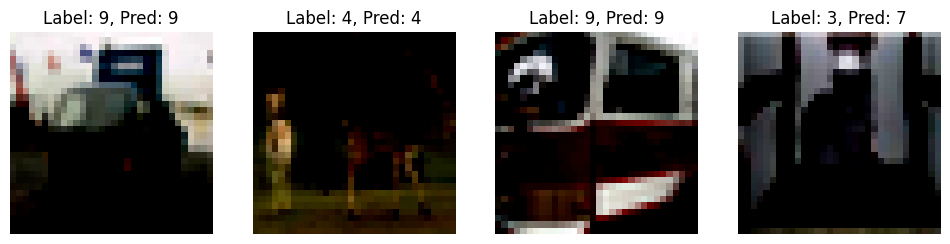

Epoch [2/4], Step [800/1021], Loss: 0.7071


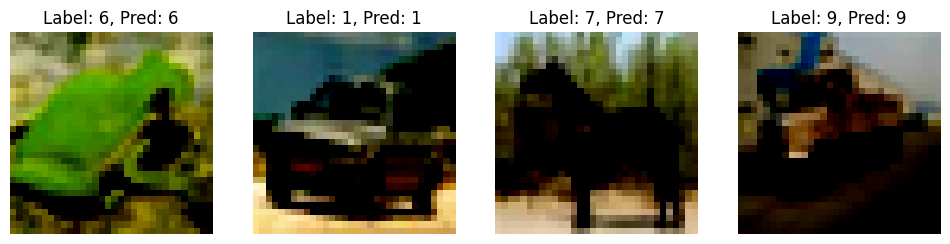

Epoch [2/4], Step [900/1021], Loss: 0.7506


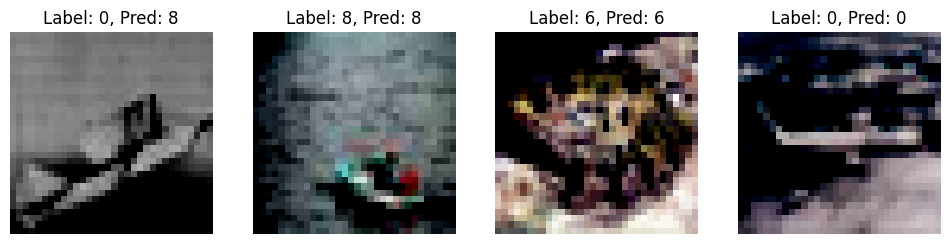

Epoch [2/4], Step [1000/1021], Loss: 0.6735


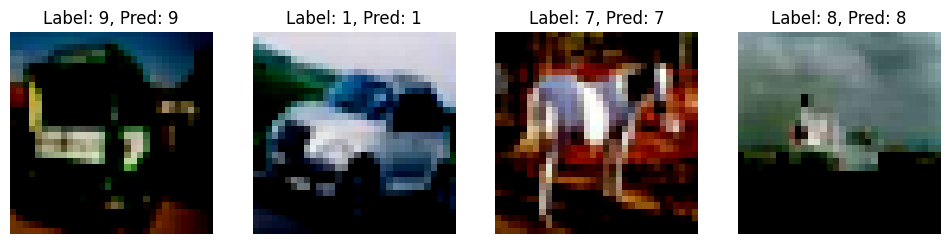

Epoch [3/4], Step [100/1021], Loss: 0.7501


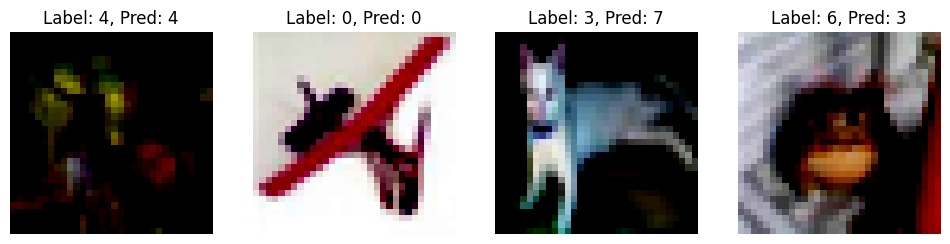

Epoch [3/4], Step [200/1021], Loss: 0.9747


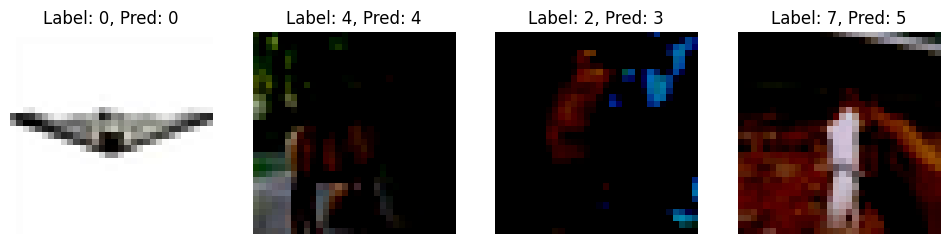

Epoch [3/4], Step [300/1021], Loss: 0.9473


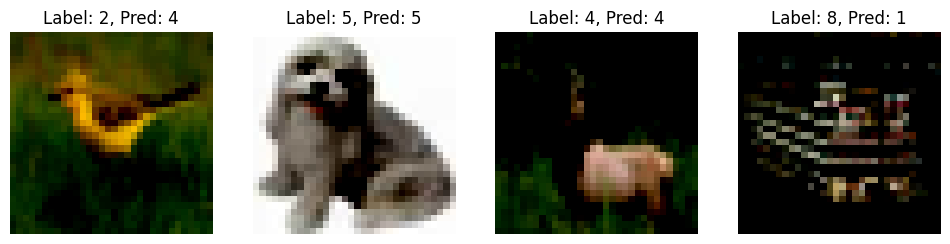

Epoch [3/4], Step [400/1021], Loss: 0.6867


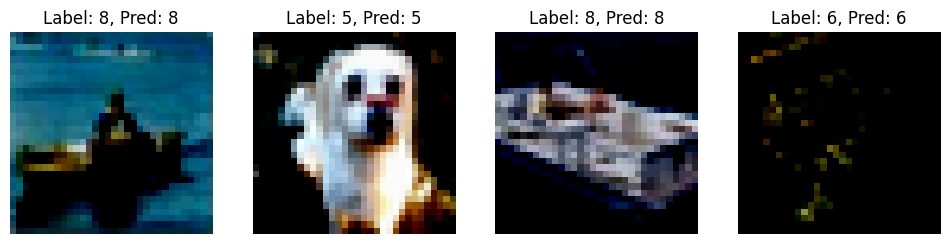

Epoch [3/4], Step [500/1021], Loss: 0.6069


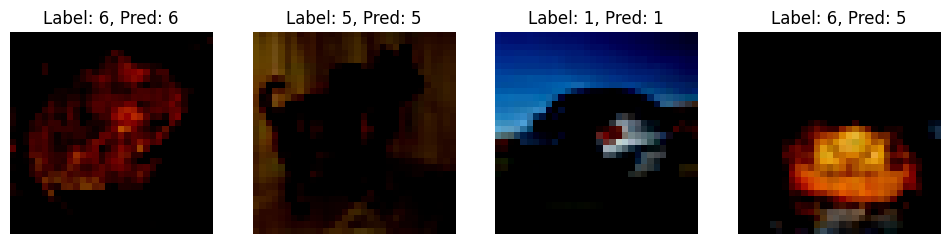

Epoch [3/4], Step [600/1021], Loss: 0.7281


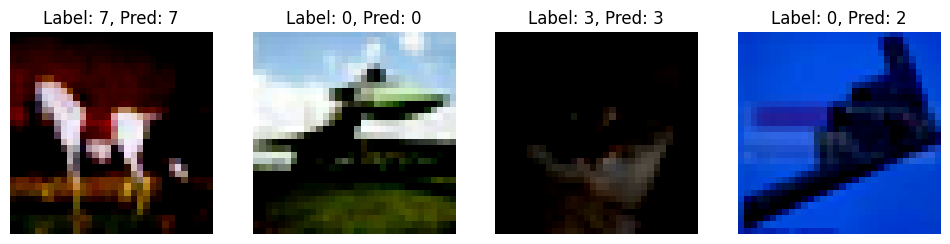

Epoch [3/4], Step [700/1021], Loss: 0.7970


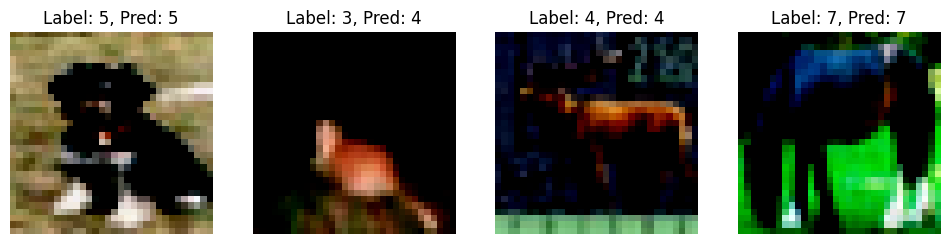

Epoch [3/4], Step [800/1021], Loss: 0.9316


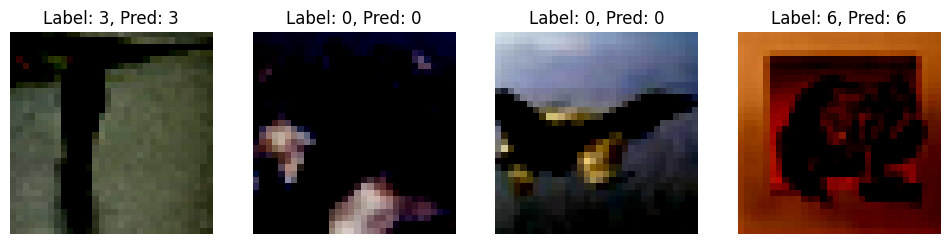

Epoch [3/4], Step [900/1021], Loss: 0.5527


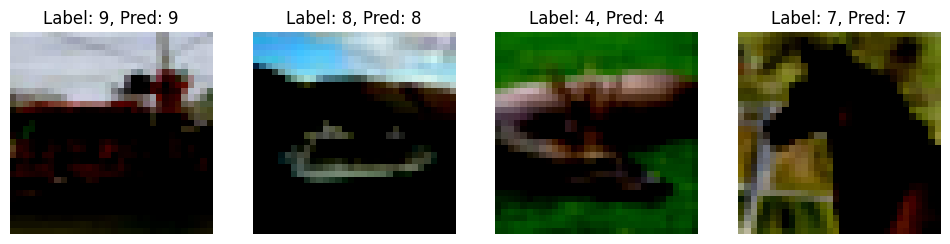

Epoch [3/4], Step [1000/1021], Loss: 0.5534


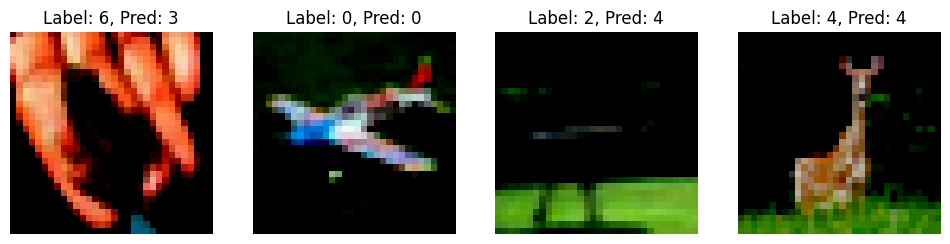

Epoch [4/4], Step [100/1021], Loss: 0.3484


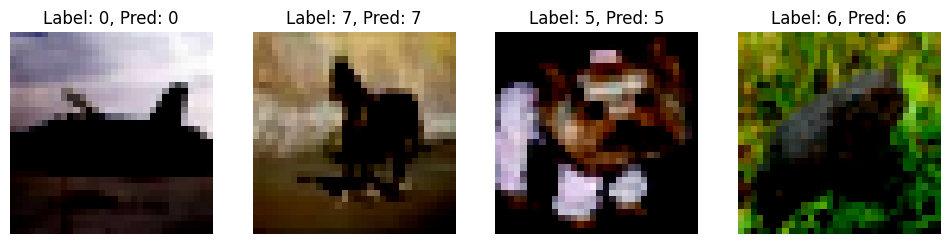

Epoch [4/4], Step [200/1021], Loss: 0.5545


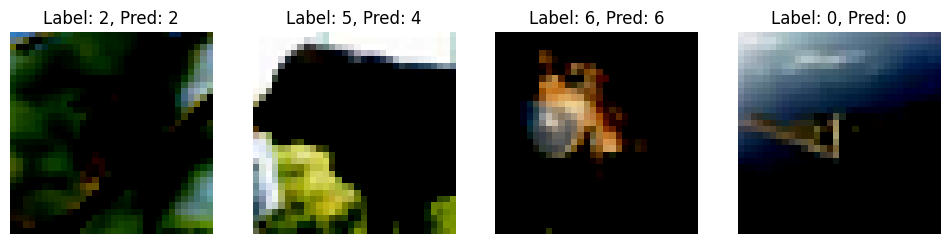

Epoch [4/4], Step [300/1021], Loss: 0.4967


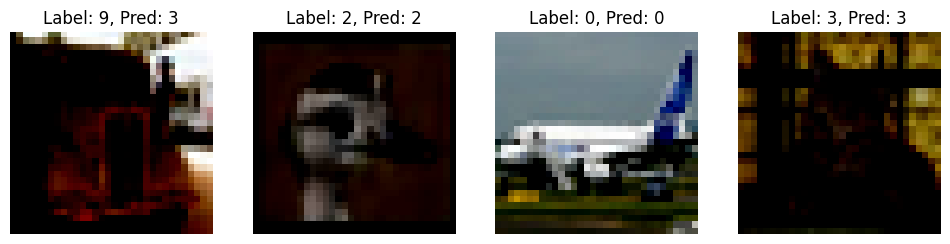

Epoch [4/4], Step [400/1021], Loss: 0.5670


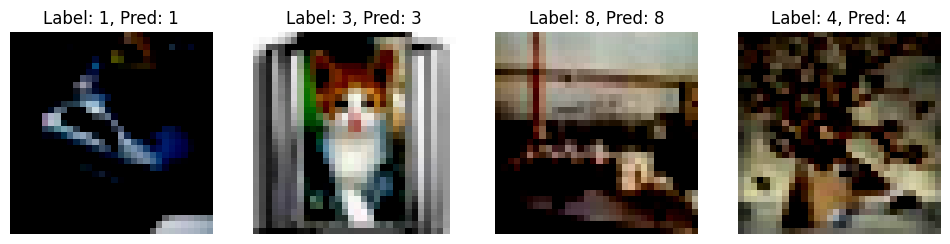

Epoch [4/4], Step [500/1021], Loss: 0.5527


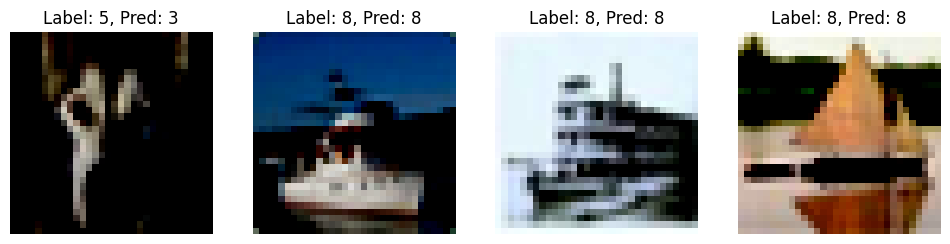

Epoch [4/4], Step [600/1021], Loss: 0.6815


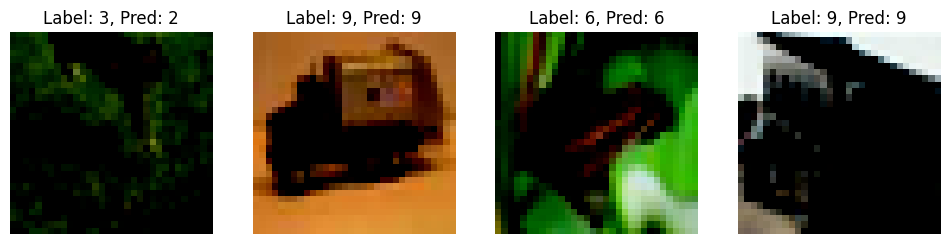

Epoch [4/4], Step [700/1021], Loss: 0.6388


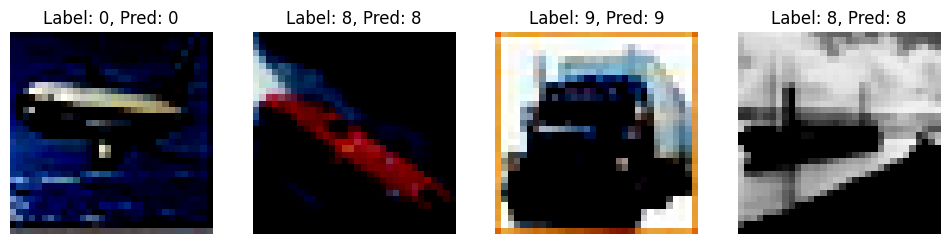

Epoch [4/4], Step [800/1021], Loss: 0.6150


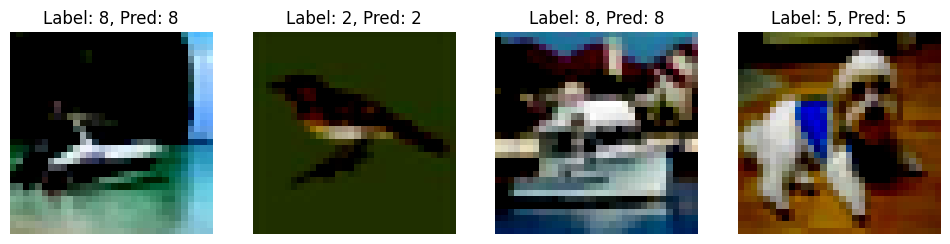

Epoch [4/4], Step [900/1021], Loss: 0.4514


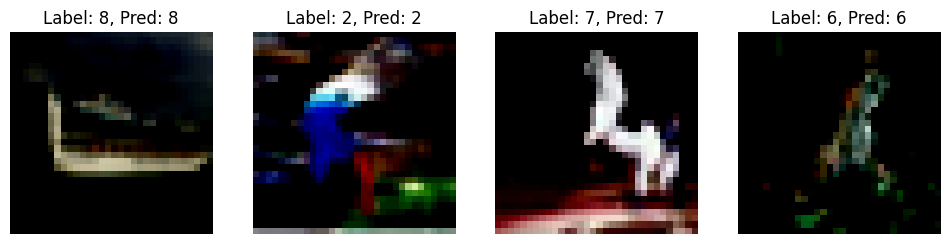

Epoch [4/4], Step [1000/1021], Loss: 0.7169


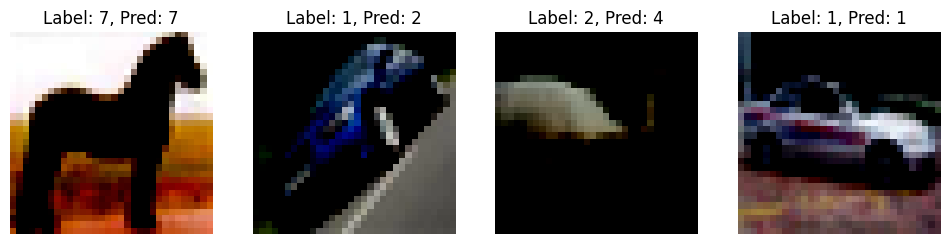

Test Accuracy: 75.11%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the CNN model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        # Change the input channels of conv1 to 3 for color images
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.avgpool1 = nn.AvgPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(128 * 8 * 8, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool1(x)

        x = self.conv3(x)
        x = self.relu3(x)
        x = self.avgpool1(x)

        x = x.view(x.size(0), -1)
        x = self.fc1(x)

        return x

# Set random seed for reproducibility
torch.manual_seed(42)

# Load Fashion MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create DataLoader
batch_size = 49
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model, loss function, and optimizer
model = CNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 4
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

            # Visualize some images
            sample_images = images[:4]  # Adjust the number of images to display
            sample_labels = labels[:4]
            sample_outputs = model(sample_images)

            plt.figure(figsize=(12, 3))
            for idx in range(sample_images.size(0)):
                plt.subplot(1, 4, idx + 1)
                img = sample_images[idx].numpy().squeeze()
                img = img.transpose(1, 2, 0)
                plt.imshow(img, cmap='gray')
                plt.title(f'Label: {sample_labels[idx]}, Pred: {torch.argmax(sample_outputs[idx])}')
                plt.axis('off')
            plt.show()

# Test the model
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')

